# Procesando imágenes con numpy

In [1]:
import matplotlib as plt
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image

## Creamos un array desde una imagen de internet

In [2]:
url="https://firebasestorage.googleapis.com/v0/b/fullstackcq.appspot.com/o/portafolio%2Fsoftware.png?alt=media&token=4d6c0913-df6e-4ce4-b53a-65ec5b351b95"
internet_image = Image.open(urllib.request.urlopen(url))

In [68]:
#transformamos la imagen en un array
#preparamos 3 arrays por separado para usarlos más adelante
#en distintos casos
image1 = np.array(internet_image)
image2 = np.array(internet_image)
image3 = np.array(internet_image)

## Explorando

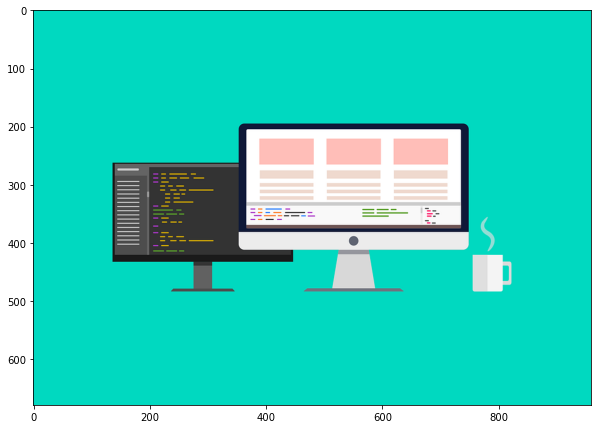

In [4]:
#como luce la imagen
plt.figure(figsize=(10,20))
plt.imshow(image1)

In [6]:
#forma
print(image1.shape)
679*960*4 #El plano está superpuesto 4 veces, 2`607.360 valores almacenados en la matriz

(679, 960, 4)


2607360

In [7]:
#tamaño total
print(image1.size)

2607360


In [9]:
print(np.amin(image1),np.amax(image1))

0 255


In [10]:
print("Fila completa")
print(image1[150])
print("_______________________________")
print("")

Fila completa
[[  0 217 192 255]
 [  0 217 192 255]
 [  0 217 192 255]
 ...
 [  0 217 192 255]
 [  0 217 192 255]
 [  0 217 192 255]]
_______________________________



In [11]:
print("Columna completa")
print(image1[:,150])
print("___________________")

Columna completa
[[  0 217 192 255]
 [  0 217 192 255]
 [  0 217 192 255]
 ...
 [  0 217 192 255]
 [  0 217 192 255]
 [  0 217 192 255]]
___________________


In [12]:
print("")
print("4 Colores de un pixel")
print(image1[150,150])
print("_______________________")


4 Colores de un pixel
[  0 217 192 255]
_______________________


In [17]:
print("")
print("El valor de un color")
print(image1[150,150,2]) #imprimo el rojo de un pixel


El valor de un color
192


In [18]:
#En este caso la imagen es PNG de 4 canales RGBA

## Modificando

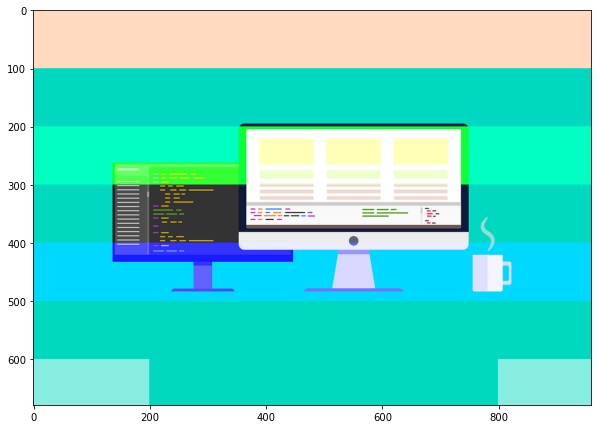

In [28]:
#seleccionamos las filas de 100 a 300, todas las columnas, color y lo llevamos a su maximo valor
image2[0:100, : ,0] = 255
image2[200:300, : ,1] = 255
image2[400:500, : ,2] = 255
image2[600:700, 200:800 ,3] = 255
plt.figure(figsize=(10,20))
plt.imshow(image2)

In [37]:
#creamos un filtro que selecciona todos los pixeles menores a 50
#esto creará una mtriz booleana del mismo tamaño que la foto
#a donde en cada pixel sea > 150 habrá un true
filtro = image3 > 150
print(filtro.shape)
print(image3.shape)

(679, 960, 4)
(679, 960, 4)


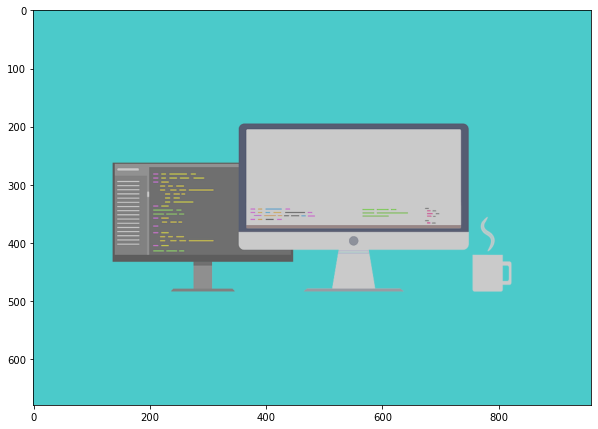

In [38]:
#aplicamos el filtro poniendo en 0 todos los pixeles
image3[filtro] = 180
plt.figure(figsize=(10,20))
plt.imshow(image3)

In [39]:
print(filtro)

[[[False  True  True  True]
  [False  True  True  True]
  [False  True  True  True]
  ...
  [False  True  True  True]
  [False  True  True  True]
  [False  True  True  True]]

 [[False  True  True  True]
  [False  True  True  True]
  [False  True  True  True]
  ...
  [False  True  True  True]
  [False  True  True  True]
  [False  True  True  True]]

 [[False  True  True  True]
  [False  True  True  True]
  [False  True  True  True]
  ...
  [False  True  True  True]
  [False  True  True  True]
  [False  True  True  True]]

 ...

 [[False  True  True  True]
  [False  True  True  True]
  [False  True  True  True]
  ...
  [False  True  True  True]
  [False  True  True  True]
  [False  True  True  True]]

 [[False  True  True  True]
  [False  True  True  True]
  [False  True  True  True]
  ...
  [False  True  True  True]
  [False  True  True  True]
  [False  True  True  True]]

 [[False  True  True  True]
  [False  True  True  True]
  [False  True  True  True]
  ...
  [False  True  True  Tr

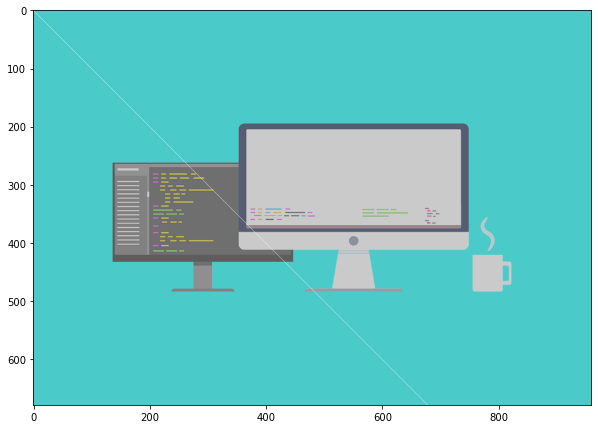

In [49]:
array_a = np.array(range(679)) #El valor de 679 es debido al numero de filas de la imagen
array_b = np.array(range(679))
image3[array_a,array_b]=255
plt.figure(figsize=(10,20))
plt.imshow(image3)

## Crearemos una mascara circular

<img src="formulaCentro.JPG">
<img src="formulaCentroSinNegatividad.JPG">

In [69]:
#Distancia al centro de D = X - Centro de X
#Distancia al centro de D = Y - Centro de Y
#Se elimina la negatividad elevando al cuadrado y se obtienen dos tablas y se fucionan
total_rows, total_cols,total_layers = image1.shape
X,Y = np.ogrid[:total_rows, :total_cols] #
print("X = ",X.shape, "and Y = ",Y.shape)

X =  (679, 1) and Y =  (1, 960)


In [70]:
#Calculamos el indice de la columna y fila central
center_row, center_col = total_rows / 2, total_cols / 2
print("Fila central = ",center_row, " Columna central = ",center_col)

Fila central =  339.5  Columna central =  480.0


In [71]:
#Calculamos  las distancias al centro y las ponemos en una matriz
dist_from_center = (X-center_row)**2 + (Y-center_col)**2 #Formula antes mostrada
print("\n Matriz que contiene las distancias al centro \n")
print(dist_from_center)
print(np.amax(dist_from_center))


 Matriz que contiene las distancias al centro 

[[345660.25 344701.25 343744.25 ... 342789.25 343744.25 344701.25]
 [344982.25 344023.25 343066.25 ... 342111.25 343066.25 344023.25]
 [344306.25 343347.25 342390.25 ... 341435.25 342390.25 343347.25]
 ...
 [343632.25 342673.25 341716.25 ... 340761.25 341716.25 342673.25]
 [344306.25 343347.25 342390.25 ... 341435.25 342390.25 343347.25]
 [344982.25 344023.25 343066.25 ... 342111.25 343066.25 344023.25]]
345660.25


In [72]:
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [79]:
#calculamos el tamaño del radio deseado
radius = (total_rows/2.5)**2
print("\nEl radio es: ",radius)


El radio es:  73766.56000000001


In [80]:
#creamos una mascara circular
circular_mask = (dist_from_center >radius)
print(circular_mask.shape)
print(circular_mask[350:550, 400:500])
print("__________________________________")
print(circular_mask)


(679, 960)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
__________________________________
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


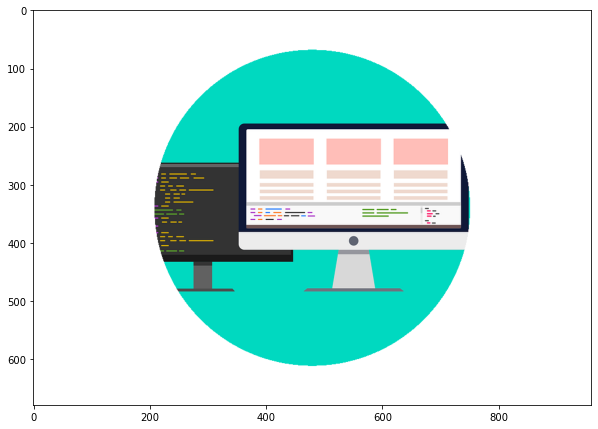

In [81]:
#aplicamos la máscara a la foto
image1[circular_mask] = 255
plt.figure(figsize=(10,20))
plt.imshow(image1)

## Filtro de colores

Imagen Original


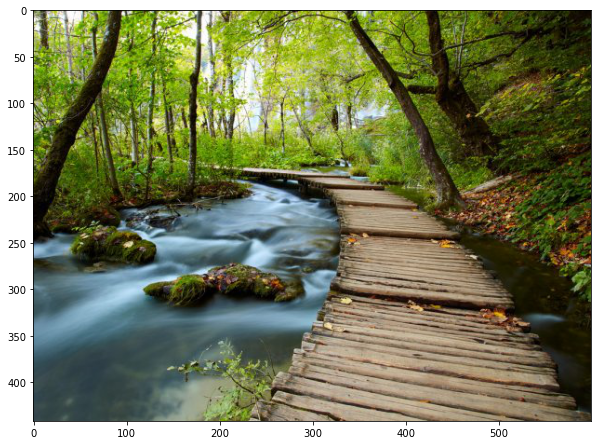

In [82]:
url="https://st.depositphotos.com/1004221/1384/i/600/depositphotos_13846233-stock-photo-boardwalk-in-the-park.jpg"
internet_image = Image.open(urllib.request.urlopen(url))
image = np.array(internet_image)
print("Imagen Original")
plt.figure(figsize=(10,20))
plt.imshow(image)

In [83]:
#creamos una máscara que tomará valor true, donde existan valores mayores a 115 en verde
print(image.shape) #Observese que esta imagen tiene los 3 canales RGB
green_mask = image[:,:,1]>115
print("Máscara verde")
print(green_mask)

(442, 600, 3)
Máscara verde
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


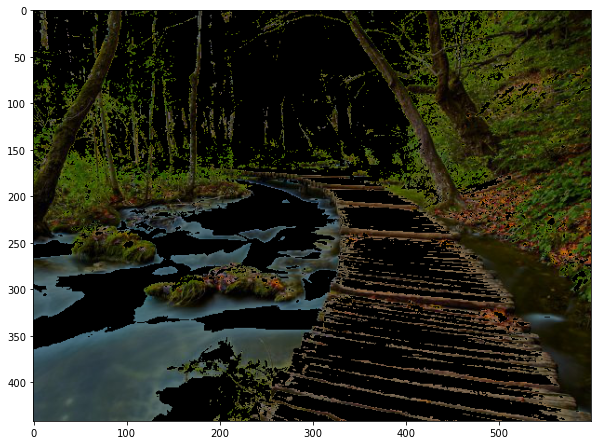

In [84]:
#Operamos sobre los pixeles a donde hay verdes intensos
image[green_mask,0]=0
image[green_mask,1]=0
image[green_mask,2]=0

print(image[green_mask])
plt.figure(figsize=(10,20))
plt.imshow(image)

Apesar de que el agua es cristalina o color blanca, tiene un alto valor de verde para formar dicho color, por ese motivo se elimina de la imagen procesada.